In [1]:
import os
import torch
import numpy as np
import sys
import os

project_root_dir = "/data1/1shared/jinjiarui/run/Diffusion-TS"
sys.path.append(project_root_dir)
os.chdir(project_root_dir)

from engine.solver import Trainer
from utils.metric_utils import visualization
from data.build_dataloader import build_dataloader
from utils.io_utils import load_yaml_config, instantiate_from_config
from models.interpretable_diffusion.model_utils import unnormalize_to_zero_to_one

/home/jinjiarui/anaconda3/envs/diffusionts/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Args_Example:
    def __init__(self) -> None:
        self.config_path = "./config/ptbxl.yaml"
        self.save_dir = "./results/ptbxl_exp"
        self.gpu = 0
        self.milestone = 10
        os.makedirs(self.save_dir, exist_ok=True)


args = Args_Example()
configs = load_yaml_config(args.config_path)
device = torch.device(f"cuda:{args.gpu}" if torch.cuda.is_available() else "cpu")

In [3]:
dl_info = build_dataloader(configs, args)
model = instantiate_from_config(configs["model"]).to(device)
trainer = Trainer(config=configs, args=args, model=model, dataloader=dl_info)

train data scale: -85.1923070438868 73.20585783243013
train data scale: -1.0 1.0


In [4]:
# trainer.train()
trainer.load(args.milestone)

In [ ]:
dataset = dl_info["dataset"]
seq_length, feature_dim = dataset.window, dataset.var_num
ori_data = np.load(
    os.path.join(dataset.dir, f"norm_truth_{seq_length}_train.npy")
)

print(f"original data scale: {np.min(ori_data)} {np.max(ori_data)}")

# ori_data = np.load(os.path.join(dataset.dir, f"{dataset_name}_norm_truth_{seq_length}_train.npy"))  # Uncomment the line if dataset other than Sine is used.
fake_data = trainer.sample(num=8192, size_every=256, shape=[seq_length, feature_dim])
if dataset.auto_norm:
    # fake_data = unnormalize_to_zero_to_one(fake_data)

    print(f"generated data scale: {np.min(fake_data)} {np.max(fake_data)}")

    np.save(os.path.join(args.save_dir, f"ddpm_fake_ptbxl.npy"), fake_data)

original data scale: -1.0 1.0


sampling loop time step:  50%|████▉     | 248/500 [01:39<01:39,  2.54it/s]

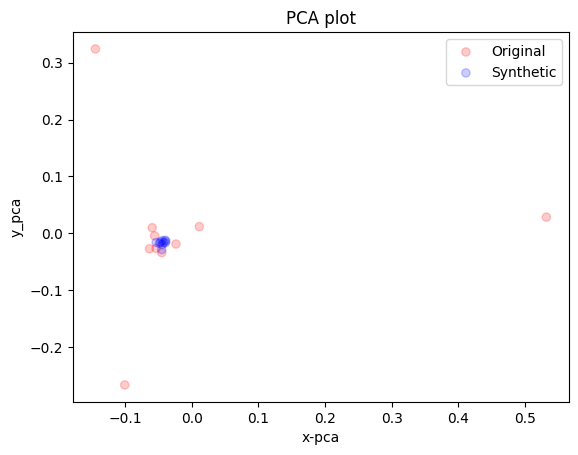

In [8]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis="pca", compare=8192)

In [7]:
visualization(
    ori_data=ori_data,
    generated_data=fake_data,
    analysis="tsne",
)

IndexError: index 32 is out of bounds for axis 0 with size 32

In [ ]:
visualization(
    ori_data=ori_data,
    generated_data=fake_data,
    analysis="kernel",
)